# Linear Operator

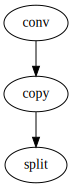

Sanity check passed, diff=0.03125 rel_diff=6.132401608738292e-08
torch.Size([1, 3, 768, 1024])


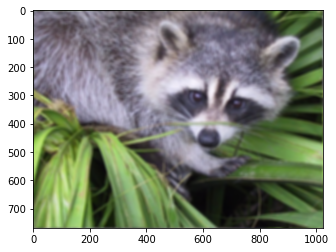

In [5]:
import dprox as dp
from dprox.utils.examples import fspecial_gaussian
from dprox.utils import to_torch_tensor, imshow

from scipy.misc import face

x = dp.Variable()
point_spread_function = fspecial_gaussian(15, 5)
op = dp.conv(x, point_spread_function)

K = dp.CompGraph(op)
K.visualize()
K.sanity_check()

img = to_torch_tensor(face(), batch=True)
out = K.forward(img)

print(img.shape)
imshow(out)


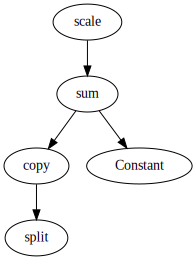

tensor([-3,  0,  3])
[Variable(id=2b243584-f094-11ed-8456-2cf05dadd712, shape=None, value=None)]
[Constant(value=tensor([-2, -2, -2]))]
tensor([-3,  0,  3])
tensor([-6, -6, -6])


In [6]:
import torch

x = dp.Variable()
y = 3 * (x - torch.tensor([2, 2, 2]))

K = dp.CompGraph(y)
K.visualize()

input = torch.tensor([1, 2, 3])
print(dp.eval(y, input, zero_out_constant=False))

print(y.variables)
print(y.constants)

x.value = torch.tensor([1, 2, 3])
print(y.value)
print(y.offset)

Sanity check passed, diff=0.03125 rel_diff=6.144808395447399e-08
torch.Size([1, 3, 768, 1024])


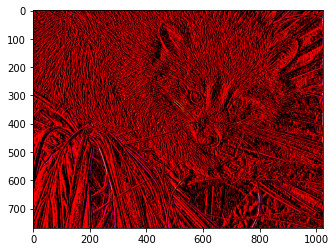

In [7]:

x = dp.Variable()
K = dp.CompGraph(dp.grad(x, dim=1) + dp.grad(x, dim=2))
K.sanity_check()
img = to_torch_tensor(face(), batch=True)
print(img.shape)
outputs = K.forward(img)
imshow(outputs*255)

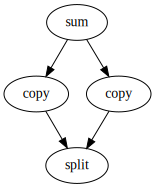

tensor([[-1.0849e+00,  7.2237e-01,  5.1652e-01,  3.1176e-01],
        [ 9.4065e-01,  1.1972e+00,  1.4552e+00, -2.0159e+00],
        [-1.7961e+00,  2.5798e-01,  8.2293e-02, -3.5252e+00],
        [ 1.0832e+00, -2.0963e-03,  1.2237e+00, -7.4363e-01]],
       grad_fn=<AddBackward0>)
tensor([[0.2500, 0.2500, 0.2500, 0.2500],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])


In [8]:

x1 = dp.Variable()
x2 = dp.Variable()

K = dp.CompGraph(x1 + x2)
K.visualize()

v1 = torch.randn((4, 4), requires_grad=True)
v2 = torch.randn((4, 4))

outputs = K.forward(v1, v2)

print(outputs)

loss = torch.mean(outputs[0])
loss.backward()
print(v1.grad)

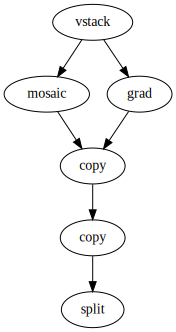

torch.Size([1, 3, 768, 1024])
torch.Size([1, 3, 768, 1024])


TypeError: rand_like(): argument 'input' (position 1) must be Tensor, not MultOutput

In [9]:
x = dp.Variable()
K = dp.CompGraph(dp.vstack([dp.mosaic(x), dp.grad(x)]))

K.visualize()

img = to_torch_tensor(face(), batch=True)
print(img.shape)

outputs = K.forward(img)
inputs = K.adjoint(outputs)
print(inputs.shape)
K.sanity_check()